In [2]:
!pip install datasets
!pip install numpy
!pip install matplotlib
!pip install Pillow
!pip install opencv-python
!pip install torch

In [3]:
import os
from datasets import load_dataset
import random
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [4]:
# class DatasetReceipt(Dataset):
#     def __init__(self, hf_datasets=None, local_folder=None, local_format="csv"):
#         """
#         Parameters:
#         - hf_datasets: list berisi nama dataset dari Hugging Face (string)
#         - local_folder: path ke folder yang berisi dataset lokal
#         - local_format: format dataset lokal, default "csv", bisa "parquet" atau lainnya
#         """
#         self.data = []

#         # Load dataset dari Hugging Face
#         if hf_datasets:
#             for dataset_name in hf_datasets:
#                 dataset = load_dataset(dataset_name, split="train")  # Load train split
#                 for item in dataset:
#                     self.data.append({"text": item["text"], "label": item.get("label", -1)})  # Sesuaikan kolomnya

#         # Load dataset dari folder lokal
#         if local_folder:
#             for file in os.listdir(local_folder):
#                 file_path = os.path.join(local_folder, file)
#                 if file.endswith(".csv") and local_format == "csv":
#                     df = pd.read_csv(file_path)
#                 elif file.endswith(".parquet") and local_format == "parquet":
#                     df = pd.read_parquet(file_path)
#                 else:
#                     continue

#                 for _, row in df.iterrows():
#                     self.data.append({"text": row["text"], "label": row.get("label", -1)})

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         return self.data[idx]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7B23FCC6BC50>


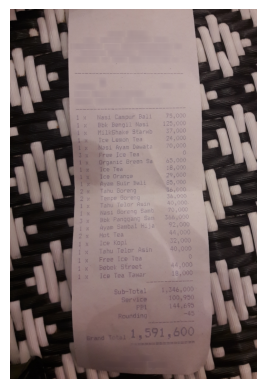

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Error dalam preprocess: operands could not be broadcast together with shapes (600,600) (2,) 


/usr/local/lib/python3.11/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


In [ ]:
dataset = load_dataset("naver-clova-ix/cord-v2")
sample_image = dataset['train'][0]['image']
print(sample_image)

plt.imshow(sample_image)
plt.axis("off")
plt.show()

mean = np.array([0.4])
std = np.array([0.2])

def resize_image(image):
    """ Convert PIL image to NumPy array and resize """
    if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("resize_image: Input harus berupa NumPy array")

    return cv2.resize(image, (600, 600))

def grey_image(image):
    """ Convert image to grayscale """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("grey_image: Input harus berupa NumPy array")

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    """ Normalize image using mean and std """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("normalize_image: Input harus berupa NumPy array")

    image = image / 255.0
    image = (image - mean) / std

    return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

def preprocess(batch):
    try:
        batch['image'] = [resize_image(img) for img in batch['image']]
        batch['image'] = [grey_image(img) for img in batch['image']]
        batch['image'] = [normalize_image(img) for img in batch['image']]

        return batch

    except Exception as e:
        print(f"Error dalam preprocess: {e}")
        return batch  # Supaya tidak crash

dataset = dataset.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

sample_image_normalization = dataset['train'][0]['image']
print(sample_image_normalization)

plt.imshow(sample_image_normalization)
plt.axis("off")
plt.show()

In [ ]:
dataset_international = load_dataset("katanaml-org/invoices-donut-data-v1")
sample_image_international = dataset_international['train'][0]['image']
print(sample_image_international)

plt.imshow(sample_image_international)
plt.axis("off")
plt.show()

mean = np.array([0.485])
std = np.array([0.229])

def resize_image(image):
    """ Convert PIL image to NumPy array and resize """
    if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("resize_image: Input harus berupa NumPy array")

    return cv2.resize(image, (600, 600))

def grey_image(image):
    """ Convert image to grayscale """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("grey_image: Input harus berupa NumPy array")

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    """ Normalize image using mean and std """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("normalize_image: Input harus berupa NumPy array")

    image = image / 255.0
    image = (image - mean) / std

    return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

def preprocess(batch):
    try:
        batch['image'] = [resize_image(img) for img in batch['image']]
        batch['image'] = [grey_image(img) for img in batch['image']]
        batch['image'] = [normalize_image(img) for img in batch['image']]

        return batch
    except Exception as e:
        print(f"Error dalam preprocess: {e}")
        return batch  # Supaya tidak crash

dataset_international = dataset_international.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

sample_image_international_normalization = dataset_international['train'][0]['image']
print(sample_image_international_normalization)

plt.imshow(sample_image_international_normalization)
plt.axis("off")
plt.show()

In [ ]:
class DatasetReceipt():
    def __init__(self, dataset_name="naver-clova-ix/cord-v2", split="train"):
        # Load dataset dari Hugging Face
        self.dataset = load_dataset(dataset_name, split=split)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample["image"]

        # Terapkan preprocessing
        image = resize_image(image)
        image = grey_image(image)
        image = normalize_image(image)

        # Konversi ke tensor
        image_tensor = torch.tensor(image).unsqueeze(0)  # Tambahkan channel untuk grayscale

        return {"image": image_tensor, "label": sample.get("label", -1)}  # Jika tidak ada label, beri -1